In [9]:
# Imports and settings
import pandas as pd
import numpy as np
from time import time
from datetime import datetime
import math
from tqdm import tqdm

# settings
import warnings
warnings.filterwarnings('ignore')
random_state = 2024
np.seed = random_state

#Visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('dark') # Theme for plots as Dark
sns.set_palette('pastel')

In [3]:
train_data = pd.read_csv("C:/Users/user/Desktop/Google_ML-Bootcamp-2024/Kaggle_Playground/train.csv")
test_data = pd.read_csv("C:/Users/user/Desktop/Google_ML-Bootcamp-2024/Kaggle_Playground/test.csv")

In [11]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3116945 entries, 0 to 3116944
Data columns (total 22 columns):
 #   Column                Dtype  
---  ------                -----  
 0   id                    int64  
 1   class                 object 
 2   cap-diameter          float64
 3   cap-shape             object 
 4   cap-surface           object 
 5   cap-color             object 
 6   does-bruise-or-bleed  object 
 7   gill-attachment       object 
 8   gill-spacing          object 
 9   gill-color            object 
 10  stem-height           float64
 11  stem-width            float64
 12  stem-root             object 
 13  stem-surface          object 
 14  stem-color            object 
 15  veil-type             object 
 16  veil-color            object 
 17  has-ring              object 
 18  ring-type             object 
 19  spore-print-color     object 
 20  habitat               object 
 21  season                object 
dtypes: float64(3), int64(1), object(18)
memory

In [8]:
values_list= []

# 각 칼럼에 대해 유니크한 변수들을 리스트에 추가
for column in train_data.columns:
    unique_values = train_data[column].unique()
    values_list.append({'Column': column, 'Unique Values': unique_values})

# 리스트를 데이터프레임으로 변환
values_df = pd.DataFrame(values_list)

# 결과 출력
values_df

,Column,Unique Values
0,id,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,..."
1,class,"[e, p]"
2,cap-diameter,"[8.8, 4.51, 6.94, 3.88, 5.85, 4.3, 9.65, 4.55,..."
3,cap-shape,"[f, x, p, b, o, c, s, d, e, n, nan, w, k, l, 1..."
4,cap-surface,"[s, h, y, l, t, e, g, nan, d, i, w, k, 15.94, ..."
5,cap-color,"[u, o, b, g, w, n, e, y, r, p, k, l, i, h, d, ..."
6,does-bruise-or-bleed,"[f, t, d, has-ring, w, o, b, x, p, nan, g, y, ..."
7,gill-attachment,"[a, x, s, d, e, nan, f, p, l, m, b, 32.54, n, ..."
8,gill-spacing,"[c, nan, d, f, x, b, a, 3.61, 2.69, k, 4.8, e,..."
9,gill-color,"[w, n, g, k, y, f, p, o, b, u, e, r, d, t, 3.4..."


## 변수 설명

### 이진 클래스
- 식용 = e
- 독성 = p (독성 클래스는 독성 여부를 알 수 없는 버섯도 포함됨)

### 나머지 변수들 (총 20개)
- n: 명목형 (nominal)
- m: 계량형 (metrical)

1. **갓 지름 (cap-diameter) (m)**: cm 단위의 소수점 숫자
2. **갓 모양 (cap-shape) (n)**: 종(b), 원뿔(c), 볼록(x), 평평(f), 오목(s), 구형(p), 기타(o)
3. **갓 표면 (cap-surface) (n)**: 섬유질(i), 홈(g), 비늘(y), 매끈(s), 광택(h), 가죽(l), 비단(k), 끈적(t), 주름(w), 육질(e)
4. **갓 색깔 (cap-color) (n)**: 갈색(n), 연갈색(b), 회색(g), 초록(r), 분홍(p), 보라(u), 빨강(e), 흰색(w), 노랑(y), 파랑(l), 주황(o), 검정(k)
5. **멍들거나 피가 나오는지 (does-bruise-bleed) (n)**: 멍이나 피가 나옴(t), 아님(f)
6. **갓-아가미 부착 (gill-attachment) (n)**: 부착(a), 부분 부착(x), 내림(d), 자유(e), 구부러짐(s), 구멍(p), 없음(f), 모름(?)
7. **아가미 간격 (gill-spacing) (n)**: 촘촘(c), 드문드문(d), 없음(f)
8. **아가미 색깔 (gill-color) (n)**: 갓 색깔 참조 + 없음(f)
9. **자루 높이 (stem-height) (m)**: cm 단위의 소수점 숫자
10. **자루 두께 (stem-width) (m)**: mm 단위의 소수점 숫자
11. **자루 뿌리 (stem-root) (n)**: 구근(b), 부풀어오름(s), 곤봉(c), 컵(u), 균일(e), 균사(z), 뿌리(r)
12. **자루 표면 (stem-surface) (n)**: 갓 표면 참조 + 없음(f)
13. **자루 색깔 (stem-color) (n)**: 갓 색깔 참조 + 없음(f)
14. **막 유형 (veil-type) (n)**: 부분적(p), 전체적(u)
15. **막 색깔 (veil-color) (n)**: 갓 색깔 참조 + 없음(f)
16. **고리 여부 (has-ring) (n)**: 고리 있음(t), 없음(f)
17. **고리 유형 (ring-type) (n)**: 거미줄(c), 덧없음(e), 퍼짐(r), 홈(g), 큰(l), 늘어짐(p), 덮음(s), 띠(z), 비늘(y), 이동 가능(m), 없음(f), 모름(?)
18. **포자 인쇄 색깔 (spore-print-color) (n)**: 갓 색깔 참조
19. **서식지 (habitat) (n)**: 풀밭(g), 낙엽(l), 초원(m), 길(p), 황야(h), 도시(u), 쓰레기장(w), 숲(d)
20. **계절 (season) (n)**: 봄(s), 여름(u), 가을(a), 겨울(w)

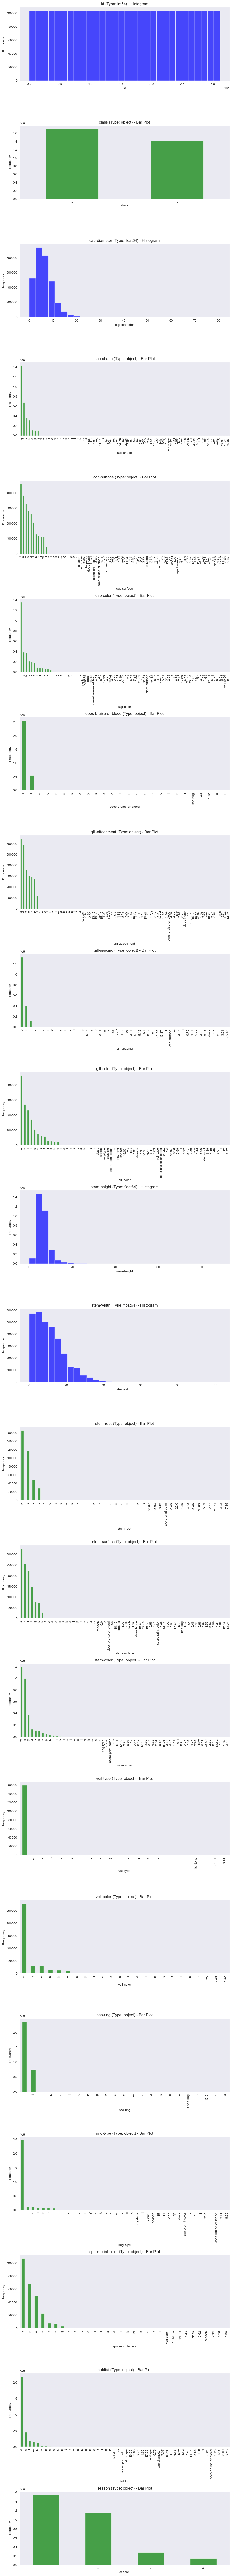

In [7]:
def plot_column_distributions(df):
    """
    이 함수는 주어진 데이터 프레임의 각 칼럼의 분포를 히스토그램으로 시각화합니다.
    
    Parameters:
    df (pd.DataFrame): 데이터 프레임
    
    Returns:
    None
    """
    num_columns = len(df.columns)
    fig, axs = plt.subplots(num_columns, 1, figsize=(10, 5 * num_columns))
    
    if num_columns == 1:
        axs = [axs]
    
    for i, column in enumerate(df.columns):
        data_type = df[column].dtype
        ax = axs[i]
        
        if data_type == 'int64' or data_type == 'float64':
            ax.hist(df[column].dropna(), bins=30, color='blue', alpha=0.7)
            ax.set_title(f'{column} (Type: {data_type}) - Histogram')
            ax.set_xlabel(column)
            ax.set_ylabel('Frequency')
        
        elif data_type == 'object':
            df[column].value_counts().plot(kind='bar', ax=ax, color='green', alpha=0.7)
            ax.set_title(f'{column} (Type: {data_type}) - Bar Plot')
            ax.set_xlabel(column)
            ax.set_ylabel('Frequency')
        
        else:
            ax.text(0.5, 0.5, f'Cannot plot {column} (Type: {data_type})', horizontalalignment='center', verticalalignment='center')
            ax.set_title(f'{column} (Type: {data_type}) - Not Plottable')
            
        
    plt.tight_layout()
    plt.show()
    
plot_column_distributions(train_data)

In [ ]:
keys=train_df.keys()
for key in keys:
    values=np.unique(train_df[key].values)#获取每列的
    
    if len(values)<10 and key!="class":
        print(f"key:{key},values:{values}") 
        key_target=train_df['class'].groupby([train_df[key]]).mean()
        keys=key_target.keys().values
        target=key_target.values
        key_target=pd.DataFrame({key:keys,key+"_class":target})
        total_df=pd.merge(total_df,key_target,on=key,how="left")